# Bag of Words

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\SOURAV\Downloads\4743416-text_filess\sample_text.csv")

In [3]:
df['text']

0                                    I am data analyst
1    I am data analyst, data scientist and data eng...
2                     I am ML engineer and AI engineer
Name: text, dtype: object

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

In [5]:
bow = CountVectorizer(stop_words='english')

In [6]:
bow.fit_transform(df['text']).toarray()

array([[0, 1, 1, 0, 0, 0],
       [0, 1, 3, 1, 0, 1],
       [1, 0, 0, 2, 1, 0]])

In [7]:
bow.get_feature_names_out()

array(['ai', 'analyst', 'data', 'engineer', 'ml', 'scientist'],
      dtype=object)

In [8]:
df2 = pd.DataFrame(columns=bow.get_feature_names_out(), data= bow.fit_transform(df['text']).toarray())

In [9]:
df

,text
0,I am data analyst
1,"I am data analyst, data scientist and data eng..."
2,I am ML engineer and AI engineer


### n_grams

In [10]:
bow = CountVectorizer(stop_words='english', ngram_range=(1,2))

In [11]:
pd.DataFrame(bow.fit_transform(df['text']).toarray(),columns=bow.get_feature_names_out() )

,ai,ai engineer,analyst,analyst data,data,data analyst,data engineer,data scientist,engineer,engineer ai,ml,ml engineer,scientist,scientist data
0,0,0,1,0,1,1,0,0,0,0,0,0,0,0
1,0,0,1,1,3,1,1,1,1,0,0,0,1,1
2,1,1,0,0,0,0,0,0,2,1,1,1,0,0


In [14]:
!pip install wordcloud

In [50]:
df = pd.read_csv(r"C:\Users\SOURAV\Downloads\4743416-text_filess\spam.csv")

In [51]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [52]:
text = ''.join(df['Message'].values)

In [69]:
ham_msg = ''.join(df[df['Category'] == 'ham']['Message'].values)

In [70]:
spam_msg = ''.join(df[df['Category'] == 'spam']['Message'].values)

In [71]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

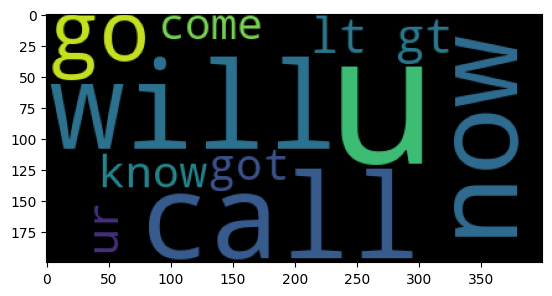

In [72]:
cloud = WordCloud(background_color='black', max_words=10).generate(text)
plt.imshow(cloud)

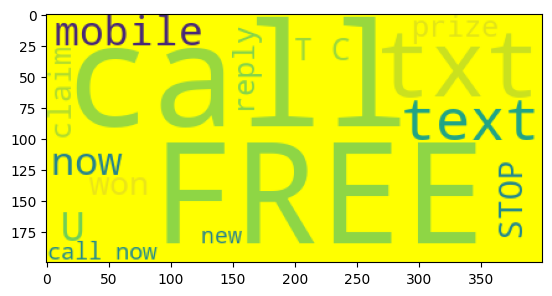

In [73]:
spam_disp = WordCloud(background_color='yellow', max_words=15).generate(spam_msg)
plt.imshow(spam_disp)

In [98]:
X = df['Message']
y = df['Category']

In [99]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(stop_words='english')

In [100]:
X = pd.DataFrame(bow.fit_transform(X).todense(), columns= bow.get_feature_names_out())

In [101]:
X

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn,ú1,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=23)

In [103]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.9031390134529148

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log = LogisticRegression()
log.fit(X_train, y_train)
y_pred = log.predict(X_test)
accuracy_score(y_test, y_pred)

0.9820627802690582

In [105]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
accuracy_score(y_test, y_pred)

0.9668161434977578

In [106]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score

gb = GaussianNB()
mb = MultinomialNB()
bb = MultinomialNB()

data = [gb,mb,bb]
acc = 0
more_acc = 0

for i in data:
    i.fit(X_train, y_train)
    y_pred = i.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    acc = score
    if score > acc:
        more_acc = score
    else:
        acc = score

print('Best is :',acc)

Best is : 0.9820627802690582


In [107]:
text = 'Hello Congrats'
num = bow.transform([text]).toarray()

In [108]:
import warnings
warnings.filterwarnings('ignore')

In [109]:
mb.predict(num)[0]

np.str_('ham')

In [110]:
def Prediction(text):
    num = bow.transform([text]).toarray()
    return mb.predict(num)[0]

In [111]:
Prediction('Hello Dear, Your email is registered sucessfully.')

np.str_('ham')

In [116]:
Prediction('Congratulations you won 900000000 lottery.')

np.str_('spam')

In [117]:
!pip install gradio

  Using cached aiofiles-24.1.0-py3-none-any.whl.metadata (10 kB)
  Using cached ffmpy-1.0.0-py3-none-any.whl.metadata (3.0 kB)
  Using cached groovy-0.1.2-py3-none-any.whl.metadata (6.1 kB)
  Using cached pydub-0.25.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached safehttpx-0.1.7-py3-none-any.whl.metadata (4.2 kB)
  Using cached semantic_version-2.10.0-py2.py3-none-any.whl.metadata (9.7 kB)
  Using cached tomlkit-0.13.3-py3-none-any.whl.metadata (2.8 kB)
  Using cached starlette-0.50.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached annotated_doc-0.0.4-py3-none-any.whl.metadata (6.6 kB)
  Using cached hf_xet-1.2.0-cp37-abi3-win_amd64.whl.metadata (5.0 kB)
  Using cached shellingham-1.5.4-py2.py3-none-any.whl.metadata (3.5 kB)
   ---------------------------------------- 0.0/24.2 MB ? eta -:--:--
    --------------------------------------- 0.5/24.2 MB 5.6 MB/s eta 0:00:05
   --- ------------------------------------ 2.1/24.2 MB 6.9 MB/s eta 0:00:04
   ----- ----------------------

In [118]:
import gradio as gr

In [119]:
iface = gr.Interface(fn=Prediction,
                    inputs= [gr.Text(label='Enter the received text')],
                    outputs= gr.Textbox('Your message type is '))

In [120]:
iface.launch()

* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.
